In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset to the python environment
data=pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
#Importing dataset into DataFrame
df = pd.DataFrame(data)
#checking for null values
pd.isnull(df).sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 1. Find out how many males and females participated in the test

In [4]:
# Count of Female and male participated in the test
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# 2. What do you think about the students' parental level of education?

Text(0, 0.5, 'Count in person')

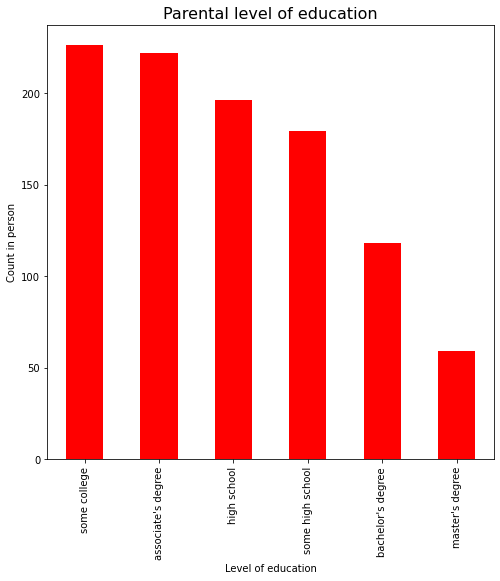

In [5]:
# Plotting the Bar graph of parental level of education
data['parental level of education'].value_counts().plot(kind='bar',
                                         figsize=(8,8),
                                         color=('red'))
plt.title('Parental level of education',fontsize=16)
plt.xlabel('Level of education')
plt.ylabel('Count in person')

In [6]:
# Summary of parental level of education
data['parental level of education'].describe()

count             1000
unique               6
top       some college
freq               226
Name: parental level of education, dtype: object

# 3. Who scores the most on average for math, reading and writing based on Gender

        math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058


Text(0, 0.5, 'Average score')

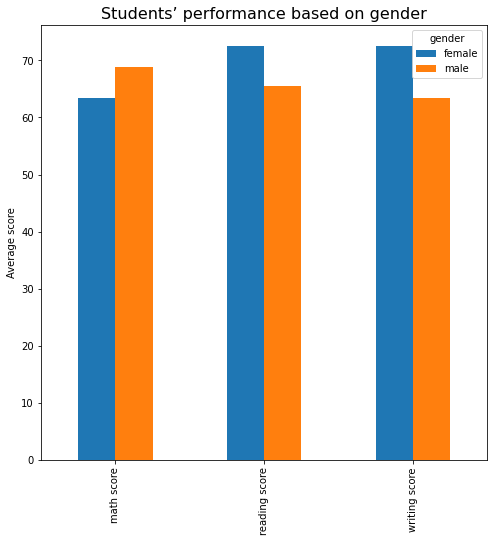

In [7]:
# grouping average for math, reading and writing based on Gender
df1=df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(df1)
# Plotting bar graph of students’ performance based on gender 
df1.T.plot(kind='bar', figsize=(8,8))
plt.title('Students’ performance based on gender',fontsize=16)
plt.ylabel('Average score')

# 3. Who scores the most on average for math, reading and writing based on Test preparation course

                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


Text(0, 0.5, 'Average score')

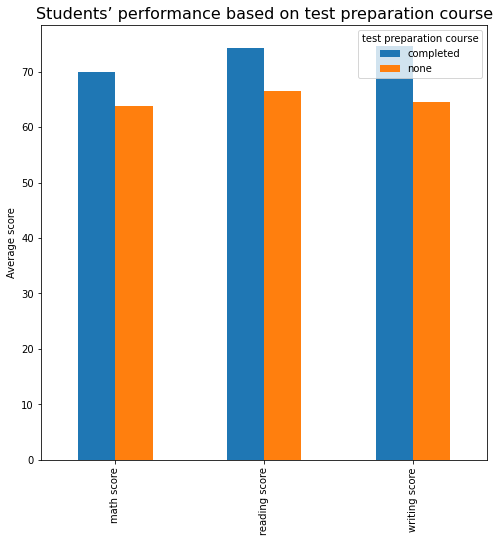

In [8]:
# grouping average for math, reading and writing based on test preparation course
df2=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(df2)
# Plotting bar graph of students’ performance based on test preparation course
df2.T.plot(kind='bar', figsize=(8,8))
plt.title('Students’ performance based on test preparation course',fontsize=16)
plt.ylabel('Average score')

# 4. What do you think about the scoring variation for math, reading and writing based on Gender

Text(0.5, 1.08, 'Scoring variation  based on gender')

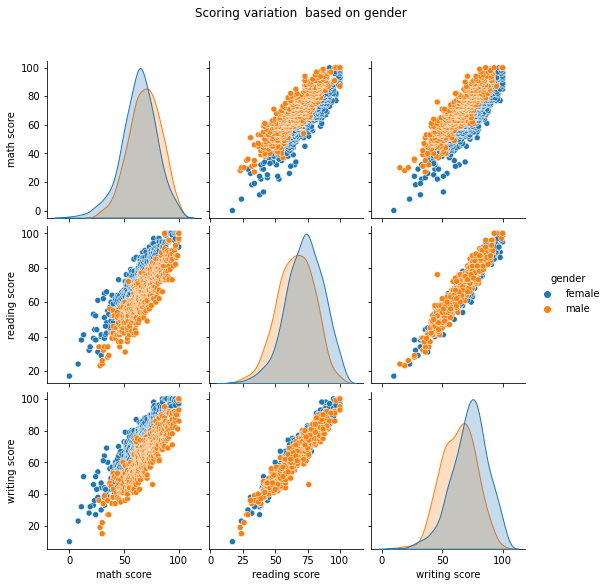

In [9]:
# Plotting a pairplot
sns.pairplot(hue='gender',data=df).fig.suptitle("Scoring variation  based on gender",y=1.08)

In [10]:
# grouping students’ performance based on gender
df3=df.groupby('gender')[['math score', 'reading score', 'writing score']]
# Variance of score based on gender
df3.var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


# 4. What do you think about the scoring variation for math, reading and writing based on Test preparation course

Text(0.5, 1.08, 'Scoring variation based on test preperation course')

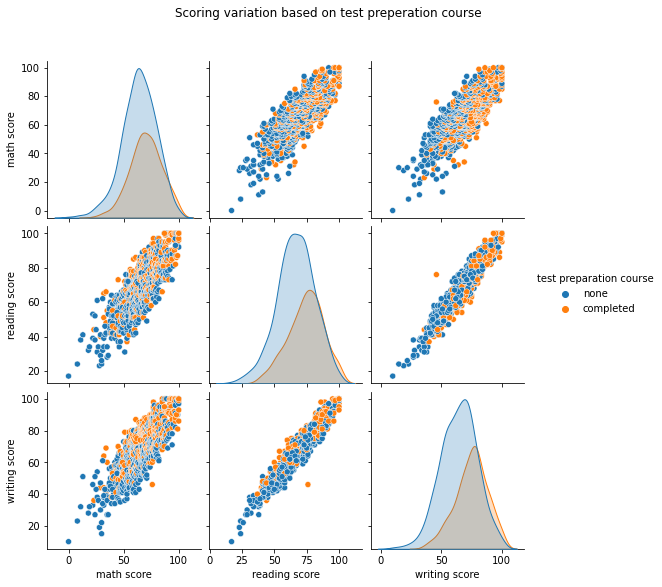

In [11]:
# Plotting a pairplot
sns.pairplot(hue='test preparation course',data=df).fig.suptitle("Scoring variation based on test preperation course",y=1.08)

In [12]:
# Grouping students’ performance based on test preparation course
df4=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']]
# Variance of score based on test preparation course
df4.var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [13]:
# Top 25% of students based on their math score
data['math score'].quantile(0.75)

77.0

In [14]:
# List of students scored above 77
df5=df[(df['math score'] >= 77)]
df5

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


Text(0.5, 1.0, 'Top 25% of students based on their math score')

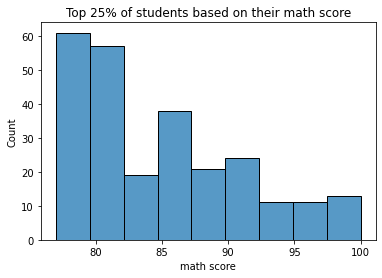

In [15]:
# Plotting histplot of Top 25% of students based on their math score
sns.histplot(df5['math score'])
plt.title('Top 25% of students based on their math score')